In [1]:
# Real Estate Price Prediction Project
# importing required libraries
import pandas as pd
import numpy as np

In [2]:
# reading csv file 
df1 = pd.read_csv('bangolore_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df2.shape

(13320, 5)

In [5]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [6]:
len(df3.location.unique())

1304

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [9]:
try:
    df3.price.apply(lambda x : float(x))
    print('price column is fine!')
except:
    print('exception found!')

price column is fine!


In [10]:
try:
    df3.bath.apply(lambda x : float(x))
    print('bath column is fine!')
except:
    print('exception found!')

bath column is fine!


In [11]:
# till now bath and price column are fine
# lets check for total_sqft colum
try:
    df3.total_sqft.apply(lambda x : float(x))
    print('price column is fine!')
except:
    print('exception found!')

exception found!


In [12]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770
648,Arekere,9 Bedroom,4125Perch,9.0,265.000
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000


In [13]:
# now i find some un usual behaviour of total_sqft column
def check_range_rows(x):
    try:
        float(x)
        return False
    except:
        temp = x.split(' - ')
        if len(temp) == 2:
            return True
    return False
df3[df3['total_sqft'].apply(check_range_rows)].shape

(144, 5)

In [14]:
# now  i am trying to average the range rows and all other unsual rows are going to be dropped
def convert_range_rows(x):
    try:
        float(x)
        return x
    except:
        temp = x.split(' - ')
        if len(temp) == 2:
            return (float(temp[0])+float(temp[1]))/2
        else:
            return None

In [15]:
df4 = df3.copy()

In [16]:
df4['total_sqft']= df4['total_sqft'].apply(convert_range_rows)
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
Name: 30, dtype: object

In [18]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., 1258.5, '774', '4689'], dtype=object)

In [19]:
try:
    df4.total_sqft.apply(lambda x : float(x))
    print('price column is fine!')
except:
    print('exception found!')

exception found!


In [20]:
df4[~df4['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
410,Kengeri,1 BHK,None,1.0,18.5
648,Arekere,9 Bedroom,None,9.0,265.0
775,Basavanagara,1 BHK,None,2.0,93.0
872,Singapura Village,2 BHK,None,2.0,45.0
1019,Marathi Layout,1 Bedroom,None,1.0,110.0
1086,Narasapura,2 Bedroom,None,2.0,29.5
1400,Chamrajpet,9 BHK,None,9.0,296.0
1712,Singena Agrahara,3 Bedroom,None,3.0,95.0
1743,Hosa Road,3 BHK,None,3.0,115.0
1821,Sarjapur,3 Bedroom,None,3.0,76.0


In [21]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [22]:
df5 = df4.dropna()

In [23]:
df5[~df5['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price


In [24]:
try:
    df5.total_sqft.apply(lambda x : float(x))
    print('toal_sqft column is fine!')
except:
    print('exception found!')

toal_sqft column is fine!


In [25]:
# till now total_sqft,price,bath columns are fine and good to go
df5.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [26]:
df5['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [27]:
def myfunc(x):
    temp = x.split(' ')
    return int(temp[0])

In [28]:
df5['size'] = df5['size'].apply(myfunc)
df5.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [29]:
try:
    df5['size'].apply(lambda x : float(x))
    print('size column is fine!')
except:
    print('exception found!')

size column is fine!


In [30]:
# till now all the columns are fine except location column.
df5.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [31]:
location_dic =df5.groupby('location')['location'].count().to_dict()

In [32]:
result_list =[]
for location,freq in location_dic.items():
    if freq <= 10:
        result_list.append(location)
len(result_list)

1058

In [33]:
df6 = df5.copy()

In [34]:
def convert_to_other(x):
    if x in result_list:
        return 'other'
    else:
        return x

In [35]:
df6['location'] = df5.location.apply(convert_to_other)
df6.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
5,Whitefield,2,1170,2.0,38.00
6,Old Airport Road,4,2732,4.0,204.00
7,Rajaji Nagar,4,3300,4.0,600.00
8,Marathahalli,3,1310,3.0,63.25
9,other,6,1020,6.0,370.00


In [36]:
len(df6.location.unique())

241

In [37]:
df6['total_sqft'] = df6['total_sqft'].astype(float)
df6.price = df6.price.astype(float)

In [38]:
df6.shape

(13200, 5)

In [39]:
# now i am going to focus on outliers
df6['price_per_sqft'] = 100000*df6['price']/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [40]:
df7 = pd.DataFrame()
for key,subdf in df6.groupby('location'):
    m = subdf.price_per_sqft.mean()
    s = subdf.price_per_sqft.std()
    new_subdf = subdf[(subdf['price_per_sqft'] >= (m-s)) & (subdf['price_per_sqft'] <=(m+s))]
    df7 = pd.concat([df7,new_subdf],ignore_index=True)
df7.shape

(11486, 6)

In [41]:
# now i want remove data whose sqft per 1 bedroom is less than 300 sqft
df8 = df7[~(df7['total_sqft']/df7['size'] <300) ]
df8.shape

(11025, 6)

In [136]:
# now i want to remove data with bath rooms greater than 2+size of the data
df9 = df8[~(df8['bath'] > df8['size']+2)]
df9.shape

(11018, 6)

In [157]:
df9.head()

,location,size,total_sqft,bath,price,price_per_sqft
index,,,,,,
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


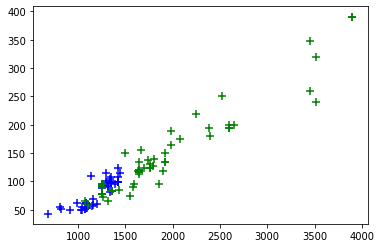

In [257]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,10)
%matplotlib inline
bhk_2 = df9[['total_sqft','price']][(df9['location'] == 'Hebbal') & (df9['size'] == 2) ]
bhk_3 = df9[['total_sqft','price']][(df9['location'] == 'Hebbal') & (df9['size'] == 3) ]
plt.scatter(bhk_2['total_sqft'],bhk_2['price'],color='blue',marker='+',label='bhk_2',s=50)
plt.scatter(bhk_3['total_sqft'],bhk_3['price'],color='green',marker='+',label='bhk_3',s=50)



In [258]:
df9.head()

,location,size,total_sqft,bath,price,price_per_sqft
index,,,,,,
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


In [259]:
df9.shape

(11018, 6)

In [267]:
def check_eligibility(size,price_per_sqft,result_dic):
    temp = size-1
    value =result_dic.get(temp)
    if value != None:
        if value > price_per_sqft :
            return False
        else:
            return True
    else:
        return True

In [277]:
df10 = pd.DataFrame()
for key1,s1_df in df9.groupby('location'):
    result_dic={}
    for key2,s2_df in s1_df.groupby('size'):
        value = s2_df['price_per_sqft'].mean()
        result_dic.__setitem__(key2,value)
    for key2,s2_df in s1_df.groupby('size'):
        new_s2_df =s2_df.copy()
        new_s2_df.index = range(len(s2_df))
        result_list =[]
        for i in range(len(s2_df)):
            result_list.append(check_eligibility(new_s2_df.loc[i,'size'],new_s2_df.loc[i,'price_per_sqft'],result_dic))
        df10 = pd.concat([df10,new_s2_df[result_list]],axis=0,ignore_index=True)
df10.shape

(6415, 6)

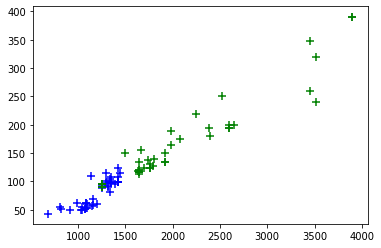

In [280]:
bhk_2 = df10[['total_sqft','price']][(df10['location'] == 'Hebbal') & (df10['size'] == 2) ]
bhk_3 = df10[['total_sqft','price']][(df10['location'] == 'Hebbal') & (df10['size'] == 3) ]
plt.scatter(bhk_2['total_sqft'],bhk_2['price'],color='blue',marker='+',label='bhk_2',s=50)
plt.scatter(bhk_3['total_sqft'],bhk_3['price'],color='green',marker='+',label='bhk_3',s=50)



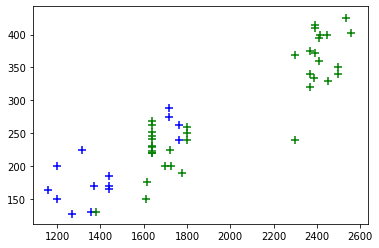

In [281]:
bhk_2 = df9[['total_sqft','price']][(df9['location'] == 'Rajaji Nagar') & (df9['size'] == 2) ]
bhk_3 = df9[['total_sqft','price']][(df9['location'] == 'Rajaji Nagar') & (df9['size'] == 3) ]
plt.scatter(bhk_2['total_sqft'],bhk_2['price'],color='blue',marker='+',label='bhk_2',s=50)
plt.scatter(bhk_3['total_sqft'],bhk_3['price'],color='green',marker='+',label='bhk_3',s=50)



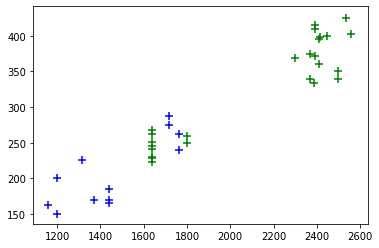

In [282]:
bhk_2 = df10[['total_sqft','price']][(df10['location'] == 'Rajaji Nagar') & (df10['size'] == 2) ]
bhk_3 = df10[['total_sqft','price']][(df10['location'] == 'Rajaji Nagar') & (df10['size'] == 3) ]
plt.scatter(bhk_2['total_sqft'],bhk_2['price'],color='blue',marker='+',label='bhk_2',s=50)
plt.scatter(bhk_3['total_sqft'],bhk_3['price'],color='green',marker='+',label='bhk_3',s=50)



In [283]:
dummies = pd.get_dummies(df10.location)
dummies.drop('other',axis='columns')
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
df11 = pd.concat([df10,dummies],axis=1)
df11.head(3)

,location,size,total_sqft,bath,price,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
X = df11.drop(['location','price_per_sqft','price'],axis='columns')
y=df11.price

In [315]:
X.head()

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2,1250.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1170.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,947.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1130.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size = 0.2)
clf = GridSearchCV(LinearRegression(),{
    'normalize':[True,False]
},cv=cv,return_train_score=False)
clf.fit(X,y)
clf.best_score_

0.7215934075330086

In [314]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X,y)
model.score(X_test,y_test)*100

76.87067539066287

In [317]:
import pickle
with open('real_estate_price_model.pickle','bw') as f:
    pickle.dump(model,f)

In [320]:
X

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2,1250.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1170.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,947.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1130.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,8,3300.0,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6411,9,4500.0,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6412,10,3300.0,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6413,13,5425.0,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [332]:
y[6411]

500.0

In [318]:
X.columns

Index(['size', 'total_sqft', 'bath', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=244)

In [326]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [333]:
def predict_price(location,size,total_sqft,bath):
    location_index = np.where(X.columns == location)[0][0]
    input_arr = np.zeros(len(X.columns))
    input_arr[1]=total_sqft
    input_arr[2]=bath
    if location_index == -1:
        print('Invalid Location!')
        return
    else:
        for i in range(3,len(X.columns)):
            if i == location_index:
                input_arr[i]=1
                break
    return model.predict([input_arr])[0]

In [334]:
predict_price('Yelahanka',8,3300,8)

366.0209274291992

In [335]:
predict_price('Yelahanka',9,4500,9)

536.6068458557129

In [340]:
import json
columns_data ={
    'columns':[x.lower() for x in X.columns]
}
with open('columns_data.json','w') as f:
    f.write(json.dumps(columns_data))

In [341]:
with open('columns_data.json','r') as f:
    json_obj=json.load(f)
json_obj

{'columns': ['size',
  'total_sqft',
  'bath',
  ' devarachikkanahalli',
  '1st block jayanagar',
  '1st phase jp nagar',
  '2nd phase judicial layout',
  '2nd stage nagarbhavi',
  '5th block hbr layout',
  '5th phase jp nagar',
  '6th phase jp nagar',
  '7th phase jp nagar',
  '8th phase jp nagar',
  '9th phase jp nagar',
  'aecs layout',
  'abbigere',
  'akshaya nagar',
  'ambalipura',
  'ambedkar nagar',
  'amruthahalli',
  'anandapura',
  'ananth nagar',
  'anekal',
  'anjanapura',
  'ardendale',
  'arekere',
  'attibele',
  'beml layout',
  'btm 2nd stage',
  'btm layout',
  'babusapalaya',
  'badavala nagar',
  'balagere',
  'banashankari',
  'banashankari stage ii',
  'banashankari stage iii',
  'banashankari stage v',
  'banashankari stage vi',
  'banaswadi',
  'banjara layout',
  'bannerghatta',
  'bannerghatta road',
  'basavangudi',
  'basaveshwara nagar',
  'battarahalli',
  'begur',
  'begur road',
  'bellandur',
  'benson town',
  'bharathi nagar',
  'bhoganhalli',
  'bil

In [344]:
columns_data = np.array(json_obj.get('columns'))

In [345]:
np.where(columns_data=='size')[0][0]

0